# Module 4
Bankruptcy Prediction:
1 EDA
2 Model building
2-1 Logistic Regression Model
2-2 SVM 
2-3 Naive Bayes Model

In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

### Ingest

In [189]:
data = pd.read_csv('data.csv')
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [190]:
data.info() #no null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

### EDA--
Looking into bankruptcy counts in this dataset.

<AxesSubplot:xlabel='Bankrupt?', ylabel='count'>

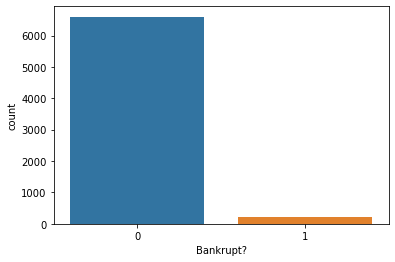

In [191]:
sns.countplot(x = 'Bankrupt?',data = data ) #visualize bankruptcy in dataset. Small portion of sample is bankrupted.

In [192]:
data['Bankrupt?'].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

Standarderization

In [212]:
x = data.drop('Bankrupt?', axis=1)
y = data['Bankrupt?']

In [213]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(x)
scaler
xs = scaler.transform(x)

StandardScaler()

In [178]:
#min_max_scaler = preprocessing.MinMaxScaler()
#xms = min_max_scaler.fit_transform(x)

## Modeling

In [237]:
x_train, x_test, y_train, y_test = train_test_split(xs, y, train_size = 0.8, random_state=42)

### Logistics Regression

In [238]:
LR_clf = LogisticRegression(max_iter=10000).fit(x_train, y_train)
LR_clf.score(x_train, y_train) #accuracy score
pred1 = LR_clf.predict(x_test) #Logistic Regression prediction

0.9726856095325389

In [239]:
pred1

array([0, 0, 0, ..., 0, 0, 0])

In [240]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred1)
tn, fp, fn, tp = confusion_matrix(y_test, pred1).ravel()
print(tn, fp, fn, tp)

array([[1306,    7],
       [  40,   11]])

1306 7 40 11


In [241]:
from sklearn.metrics import precision_score, recall_score,classification_report
precision_score(y_test, pred1)
recall_score(y_test, pred1)    
print(classification_report(y_test,pred1))

0.6111111111111112

0.21568627450980393

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1313
           1       0.61      0.22      0.32        51

    accuracy                           0.97      1364
   macro avg       0.79      0.61      0.65      1364
weighted avg       0.96      0.97      0.96      1364



In [273]:
from sklearn.metrics import f1_score
f1_score(y_test, pred1)

0.31884057971014496

Logistic Regression with L2 penalty

In [405]:
clf_l1_LR = LogisticRegression(C=1000, 
                               penalty="l2", 
                               #tol=0.01, 
                               solver="liblinear").fit(x_train, y_train)
#clf_l1_LR.score(x_train, y_train)
pred12 = clf_l1_LR.predict(x_test)
precision_score(y_test, pred12)
recall_score(y_test, pred12)

0.5909090909090909

0.2549019607843137

In [406]:
confusion_matrix(y_test, pred12)
tn, fp, fn, tp = confusion_matrix(y_test, pred12).ravel()
print(tn, fp, fn, tp)

array([[1304,    9],
       [  38,   13]])

1304 9 38 13


In [407]:
print(classification_report(y_test,pred12))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1313
           1       0.59      0.25      0.36        51

    accuracy                           0.97      1364
   macro avg       0.78      0.62      0.67      1364
weighted avg       0.96      0.97      0.96      1364



Metrics and ROC curve

(-50.0, 20.0)

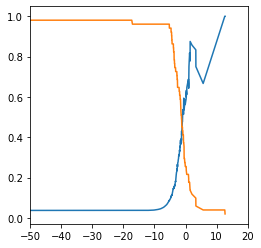

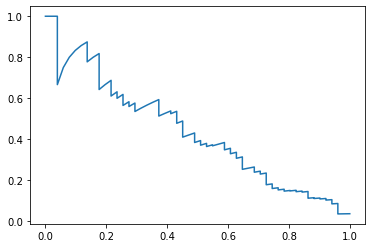

In [480]:
probs_y=clf_l1_LR.predict_proba(x_test)[::,1]
y_score = clf_l1_LR.decision_function(x_test)
from sklearn.metrics import precision_recall_curve
from sklearn import metrics
from sklearn.metrics import roc_auc_score
precision, recall, thresholds = precision_recall_curve(y_test, y_score)

fig1, ax = plt.subplots()
ax.set_xlim(-50, 20)
plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")

ax.set_box_aspect(1)
plt.show()

plt.plot(recall, precision)

Text(0.5, 1.0, 'Logistic Regression Model ROC Curve')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 0, 'False Positive Rate')

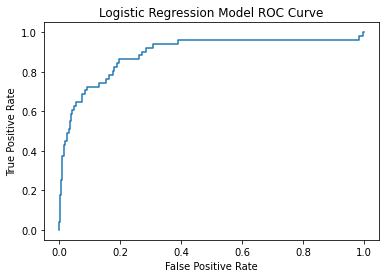

In [454]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score)
plt.plot(fpr,tpr)
plt.title('Logistic Regression Model ROC Curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [455]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, probs_y)


0.8917163209533624

### SVM 

In [300]:
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(x_train, y_train)
svm_clf.score(x_train, y_train)
pred2 = svm_clf.predict(x_test)

SVC()

0.9730522456461962

In [232]:
confusion_matrix(y_test, pred2)
tn, fp, fn, tp = confusion_matrix(y_test, pred2).ravel()
print(tn, fp, fn, tp)

array([[1313,    0],
       [  50,    1]])

1313 0 50 1


In [233]:
precision_score(y_test, pred2)
recall_score(y_test, pred2)    
print(classification_report(y_test,pred2))

1.0

0.0196078431372549

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1313
           1       1.00      0.02      0.04        51

    accuracy                           0.96      1364
   macro avg       0.98      0.51      0.51      1364
weighted avg       0.96      0.96      0.95      1364



Hyperparameter Tuning 

In [377]:
from sklearn.model_selection import GridSearchCV
Kernel = ['linear','rbf']
C= [0.1,1,10,20,50,100,150,200]
gamma = ['scale']
grid = dict(kernel=Kernel,C=C,gamma=gamma)
gs = GridSearchCV(estimator=svm_clf, 
             param_grid=grid, 
             n_jobs=-1)
gs_fit = gs.fit(x_train, y_train)
print("Best: %f using %s" % (gs_fit.best_score_, gs_fit.best_params_))


Best: 0.969019 using {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}


In [448]:
SVC_ht = SVC(kernel = 'rbf', 
             C = 150, 
             gamma = 'scale').fit(x_train, y_train)
pred22 = SVC_ht.predict(x_test)
print(classification_report(y_test,pred22))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1313
           1       0.47      0.27      0.35        51

    accuracy                           0.96      1364
   macro avg       0.72      0.63      0.66      1364
weighted avg       0.95      0.96      0.96      1364



In [354]:
confusion_matrix(y_test, pred22)
tn, fp, fn, tp = confusion_matrix(y_test, pred22).ravel()
print(tn, fp, fn, tp)

array([[1313,    0],
       [  49,    2]])

1313 0 48 3


The hyperparameter tuning did come out with high accuracy score but very low f1 score.

Text(0.5, 1.0, 'Logistic Regression Model ROC Curve')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 0, 'False Positive Rate')

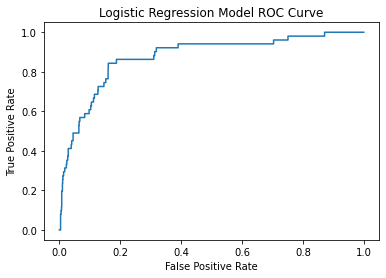

In [434]:
y_score2 = SVC_ht.decision_function(x_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score2)
plt.plot(fpr,tpr)
plt.title('Logistic Regression Model ROC Curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [435]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_score2)

0.8755880112898167

### Naive Bayes Model

In [460]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
pred3 = gnb.fit(x_train, y_train).predict(x_test)

In [461]:
confusion_matrix(y_test, pred3)
tn, fp, fn, tp = confusion_matrix(y_test, pred3).ravel()
print(tn, fp, fn, tp)

array([[ 183, 1130],
       [   3,   48]])

183 1130 3 48


In [462]:
precision_score(y_test, pred3)
recall_score(y_test, pred3)    
roc_auc_score(y_test, y_score2)
print(classification_report(y_test,pred3))

0.04074702886247878

0.9411764705882353

0.8755880112898167

              precision    recall  f1-score   support

           0       0.98      0.14      0.24      1313
           1       0.04      0.94      0.08        51

    accuracy                           0.17      1364
   macro avg       0.51      0.54      0.16      1364
weighted avg       0.95      0.17      0.24      1364



In general, model, the accuracy, f1 score, precision, recall, roc score are varied in the three models:

L2 Logistics Regresion:
Accuracy: 0.97
F1 score: 0.36
Precision: 0.59
Recall: 0.25
roc score: 0.89

Tuned SVM:
Accuracy: 0.96
F1 score: 0.35
Precision: 0.47
Recall: 0.27
roc score: 0.87

Naive Bayes:
Accuracy: 0.17
F1 score: 0.08
Precision: 0.04
Recall: 0.94
roc score: --